In [35]:
# import libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
df = pd.read_csv("/Users/maxwellpearse/Library/Mobile Documents/com~apple~CloudDocs/Life/b.Business, Money, Education,  Employment/Python/data_jobs.csv")

# cleaning data
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [36]:
# Only get Data Analyst jobs in the US
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

In [37]:
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

df_DA_US_exploded = df_DA_US.explode("job_skills")

df_DA_US_exploded[["salary_year_avg", "job_skills"]].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [38]:
df_DA_skills = df_DA_US_exploded.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False)

df_DA_skills = df_DA_skills.rename(columns={"count": "skill_count", "median": "median_salary"})

df_job_count = len(df_DA_US)

df_DA_skills["skill_percent"]= df_DA_skills["skill_count"]/df_job_count*100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills["skill_percent"] > skill_percent]

df_DA_skills_high_demand


,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


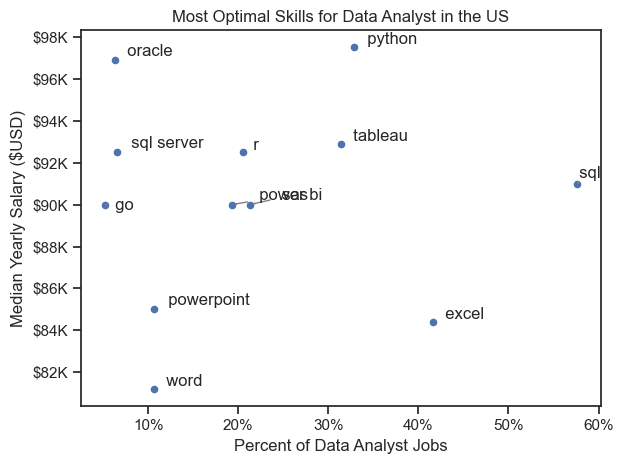

In [54]:
from adjustText import adjust_text
import matplotlib.ticker as ticker

texts = []
df_DA_skills_high_demand.plot(kind="scatter", x="skill_percent", y="median_salary")

for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_percent"].iloc[i], df_DA_skills_high_demand["median_salary"].iloc[i], f"  {txt}"))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=1)) #crux of the whole thing not overlapping

ax = plt.gca() #fig, ax = plt.subplots() # now have access to the axis or ax = plt.gca() get current axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K")) # pos is index value of each of tick marks( need to call it)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:,.0f}%"))

plt.xlabel("Percent of Data Analyst Jobs")
plt.ylabel("Median Yearly Salary ($USD)")
plt.title("Most Optimal Skills for Data Analyst in the US")

plt.tight_layout()
plt.show()

In [40]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['alteryx',
  'microstrategy',
  'tableau',
  'ssis',
  'outlook',
  'word',
  'cognos',
  'sap',
  'datarobot',
  'sharepoint',
  'nuix',
  'powerpoint',
  'msaccess',
  'sas',
  'qlik',
  'dax',
  'visio',
  'ms access',
  'splunk',
  'spss',
  'sheets',
  'esquisse',
  'ssrs',
  'spreadsheet',
  'powerbi',
  'power bi',
  'excel',
  'looker'],
 'programming': ['apl',
  'typescript',
  'dart',
  'erlang',
  'go',
  'powershell',
  'mongodb',
  'rust',
  'haskell',
  'r',
  'javascript',
  'matlab',
  'bash',
  'swift',
  'objective-c',
  'cobol',
  'css',
  'vb.net',
  'c#',
  'vba',
  'visualbasic',
  'scala',
  'ruby',
  'sql',
  'kotlin',
  'fortran',
  'nosql',
  'sas',
  'solidity',
  't-sql',
  'lisp',
  'sass',
  'perl',
  'julia',
  'elixir',
  'ocaml',
  'golang',
  'pascal',
  'assembly',
  'groovy',
  'lua',
  'c',
  'delphi',
  'java',
  'f#',
  'html',
  'python',
  'shell',
  'crystal',
  'mongo',
  'clojure',
  'c++',
  'php',
  'no-sql',
  'visual ba

In [41]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns = ["technology", "skills"])

df_technology = df_technology.explode("skills")

df_technology

,technology,skills
0,analyst_tools,alteryx
0,analyst_tools,microstrategy
0,analyst_tools,tableau
0,analyst_tools,ssis
0,analyst_tools,outlook
...,...,...
9,sync,slack
9,sync,ringcentral
9,sync,unify
9,sync,google chat


In [42]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on="job_skills", right_on="skills")

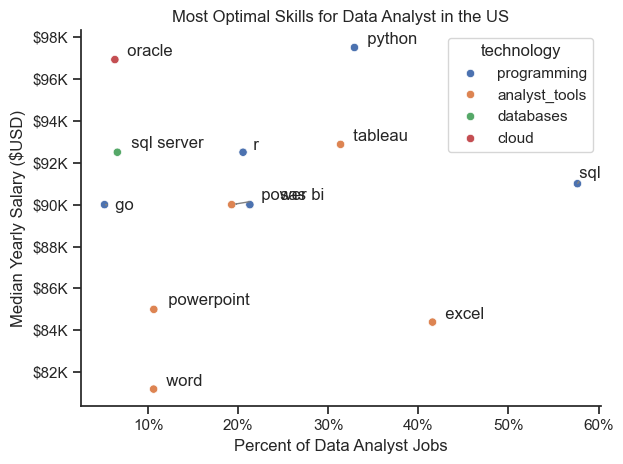

In [57]:
from adjustText import adjust_text
import matplotlib.ticker as ticker

texts = []
#df_plot.plot(kind="scatter", x="skill_percent", y="median_salary")
sns.scatterplot(
    data=df_plot,
    x="skill_percent",
    y="median_salary",
    hue="technology"
)

sns.despine()
sns.set_theme(style="ticks")

for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_percent"].iloc[i], df_DA_skills_high_demand["median_salary"].iloc[i], f"  {txt}"))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=1)) #crux of the whole thing not overlapping

ax = plt.gca() #fig, ax = plt.subplots() # now have access to the axis or ax = plt.gca() get current axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K")) # pos is index value of each of tick marks( need to call it)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:,.0f}%"))

plt.xlabel("Percent of Data Analyst Jobs")
plt.ylabel("Median Yearly Salary ($USD)")
plt.title("Most Optimal Skills for Data Analyst in the US")

plt.tight_layout()
plt.show()